In [1]:
import pandas as pd
from clean_crash_data import crash_data

c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:4: DtypeWarning: Columns (8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_raw = pd.read_csv("Traffic_Crash_Reports__CPD_.csv")
c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  crash_data.loc[:, 'CRASHDATE'] = pd.to_datetime(crash_data.CRASHDATE)
c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  crash_data.loc[:, 'DA

# Where are crashes happening most frequently?

In [2]:
crash_data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique()

,LOCALREPORTNO
ADDRESS_X,
% N I75 AT 2.7%,1
0-X W 562 AT I75,4
0-X W NORWOOD LATERAL,9
0.0X S I71 EX,1
0.X E NORWOOD LATERAL,7
...,...
XX WILLIAM HOWARD,2
XX WILLIAM HOWARD TAFT,19
XX WILLIAM HOWARD TAFT RD,156


It looks like there are very few locations where there are more than 100 traffic incidents.

In [3]:
crash_data.ADDRESS_X.nunique()

13347

<AxesSubplot: xlabel='ADDRESS_X'>

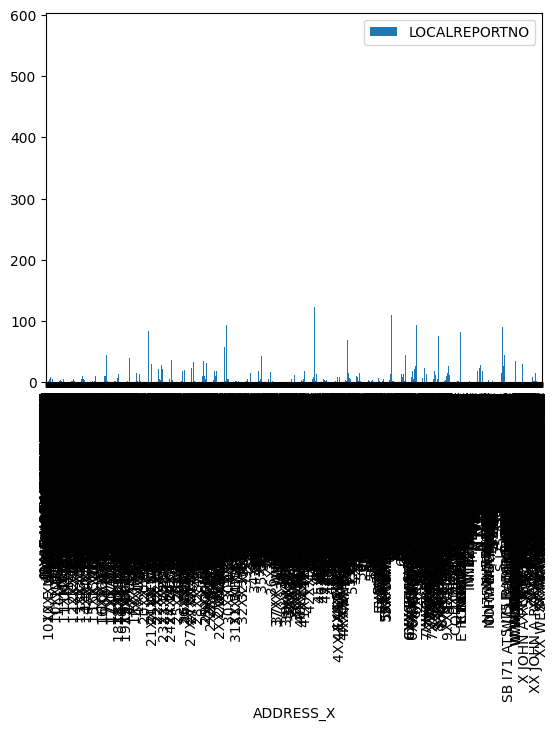

In [4]:
crash_data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique().plot(kind='bar')

There are 13,573 unique addresses out of 328,558 records / 169,706 reports.

In [5]:
addr_incs = crash_data[['ADDRESS_X', 'LOCALREPORTNO']]

In [6]:
addr_incs_grp = addr_incs.groupby('ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False)

<AxesSubplot: xlabel='ADDRESS_X'>

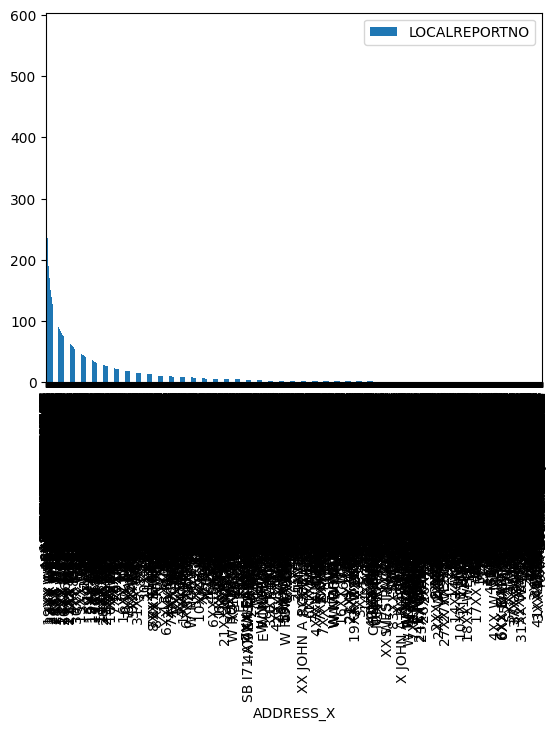

In [7]:
addr_incs_grp.plot(kind='bar')

In [8]:
addr_incs_grp.describe()

,LOCALREPORTNO
count,13347.000000
mean,12.713793
std,29.533590
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,575.000000


While most addresses have 10 or fewer crashes over the last decade, the most crashes that have occurred at a single address is 575! Let's look at the top 25%.

In [9]:
top_qtr = addr_incs_grp.loc[addr_incs_grp.LOCALREPORTNO > 10]

In [10]:
top_qtr_data = crash_data[crash_data.ADDRESS_X.isin(top_qtr.index)]

In [11]:
top_qtr_data.LOCALREPORTNO.nunique()

141371

In [17]:
top_qtr_crashes = top_qtr_data.groupby('ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False)['LOCALREPORTNO']

In [18]:
top_qtr_crashes[0:10]

ADDRESS_X
2XX W MITCHELL AVE    575
1XX W MITCHELL AVE    483
61XX GLENWAY AVE      472
2XX CALHOUN ST        404
44XX COLERAIN AVE     399
49XX GLENWAY AVE      375
16XX WESTWOOD AVE     368
35XX READING RD       352
39XX VINE ST          350
55XX COLERAIN AVE     349
Name: LOCALREPORTNO, dtype: int64

2XX W Mitchell Avenue is the location with 575 crashes. Interestingly, 1XX W Mitchell Avenue is the next highest at 483 crashes.

# W Mitchell Ave

In [13]:
w_mitchell_avenue = crash_data[crash_data['ADDRESS_X'].str.contains('W MITCHELL AV', case=False, na=False)]

In [14]:
w_mitchell_avenue.groupby(by='ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False).LOCALREPORTNO

ADDRESS_X
2XX W MITCHELL AVE     575
1XX W MITCHELL AVE     483
XX W MITCHELL AVE      260
X W MITCHELL AVE       101
W MITCHELL AVE          63
45XX W MITCHELL AVE     54
44XX W MITCHELL AVE     52
3XX W MITCHELL AVE      24
46XX W MITCHELL AVE      8
2XX  W MITCHELL AVE      1
47XX W MITCHELL AVE      1
4XX W MITCHELL AVE       1
Name: LOCALREPORTNO, dtype: int64

Google Maps From 4600 W Mitchell Ave to 1 W Mitchell Ave
https://www.google.com/maps/dir/1+W+Mitchell+Ave,+Cincinnati,+OH+45217/4600+W+Mitchell+Ave,+Cincinnati,+OH+45232/@39.1661648,-84.5191883,15z/data=!3m1!4b1!4m13!4m12!1m5!1m1!1s0x8841b36d88f31241:0x8e4b4ba441fad80e!2m2!1d-84.5044751!2d39.1603458!1m5!1m1!1s0x8841b35d97dc6419:0xb01843254e6d7e95!2m2!1d-84.5149961!2d39.1719619

In [16]:
w_mitchell_avenue.LOCALREPORTNO.nunique() / crash_data.LOCALREPORTNO.nunique()

0.009563598222808858

W Mitchell Avenue accounts for .96% of crashes over the last decade, so that doesn't sound extreme.